In [58]:
using Plots
using readOOData
using DelimitedFiles
using Interpolations
using Statistics
using matlabMigration 
using DataFrames
using Trapz

ENV["COLUMNS"] = 1000
# plotly()
pyplot()

Plots.PyPlotBackend()

In [59]:
fileName = "temp1.log"
name = "temp1"
data = readdlm(fileName,' ',skipstart=1)

workTimeInd = 1:size(data)[1];
tempChanInd = 3;
uHighInd = 9:12;


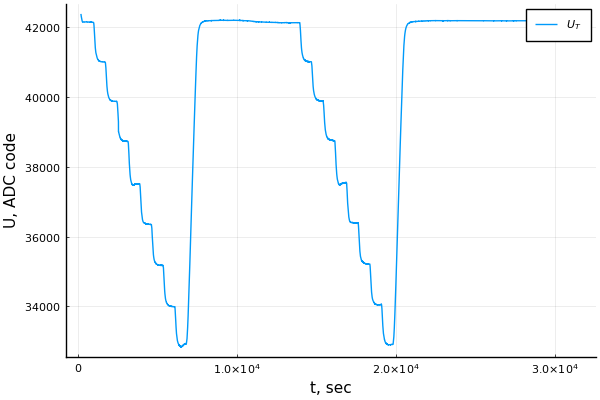

In [60]:
time1 = data[workTimeInd,2];
tempSens = data[workTimeInd,tempChanInd];

plot(time1[:],tempSens[:,1],xlabel = "t, sec",ylabel = "U, ADC code", label="\$ U_T \$", titel = "Temperature sensor data")


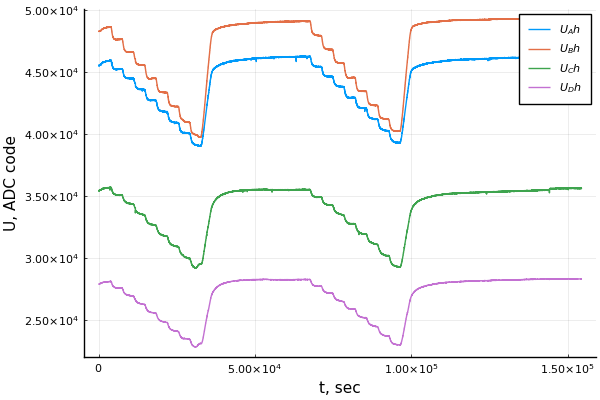

In [61]:
time1 = data[workTimeInd,1];
U = data[workTimeInd,uHighInd[1:end]];

plot(time1[:],U[:,1],xlabel = "t, sec",ylabel = "U, ADC code", label="\$ U_Ah \$")
plot!(time1[:],U[:,2],xlabel = "t, sec",ylabel = "U, ADC code", label="\$ U_Bh \$")
plot!(time1[:],U[:,3],xlabel = "t, sec",ylabel = "U, ADC code", label="\$ U_Ch \$")
plot!(time1[:],U[:,4],xlabel = "t, sec",ylabel = "U, ADC code", label="\$ U_Dh \$")

## Linear fitting

In [62]:
x = [ones(size(tempSens)) tempSens ]
A = x \ U

2×4 Array{Float64,2}:
 15706.7       7963.01      9028.23      5107.37
     0.718967     0.973319     0.624989     0.546662

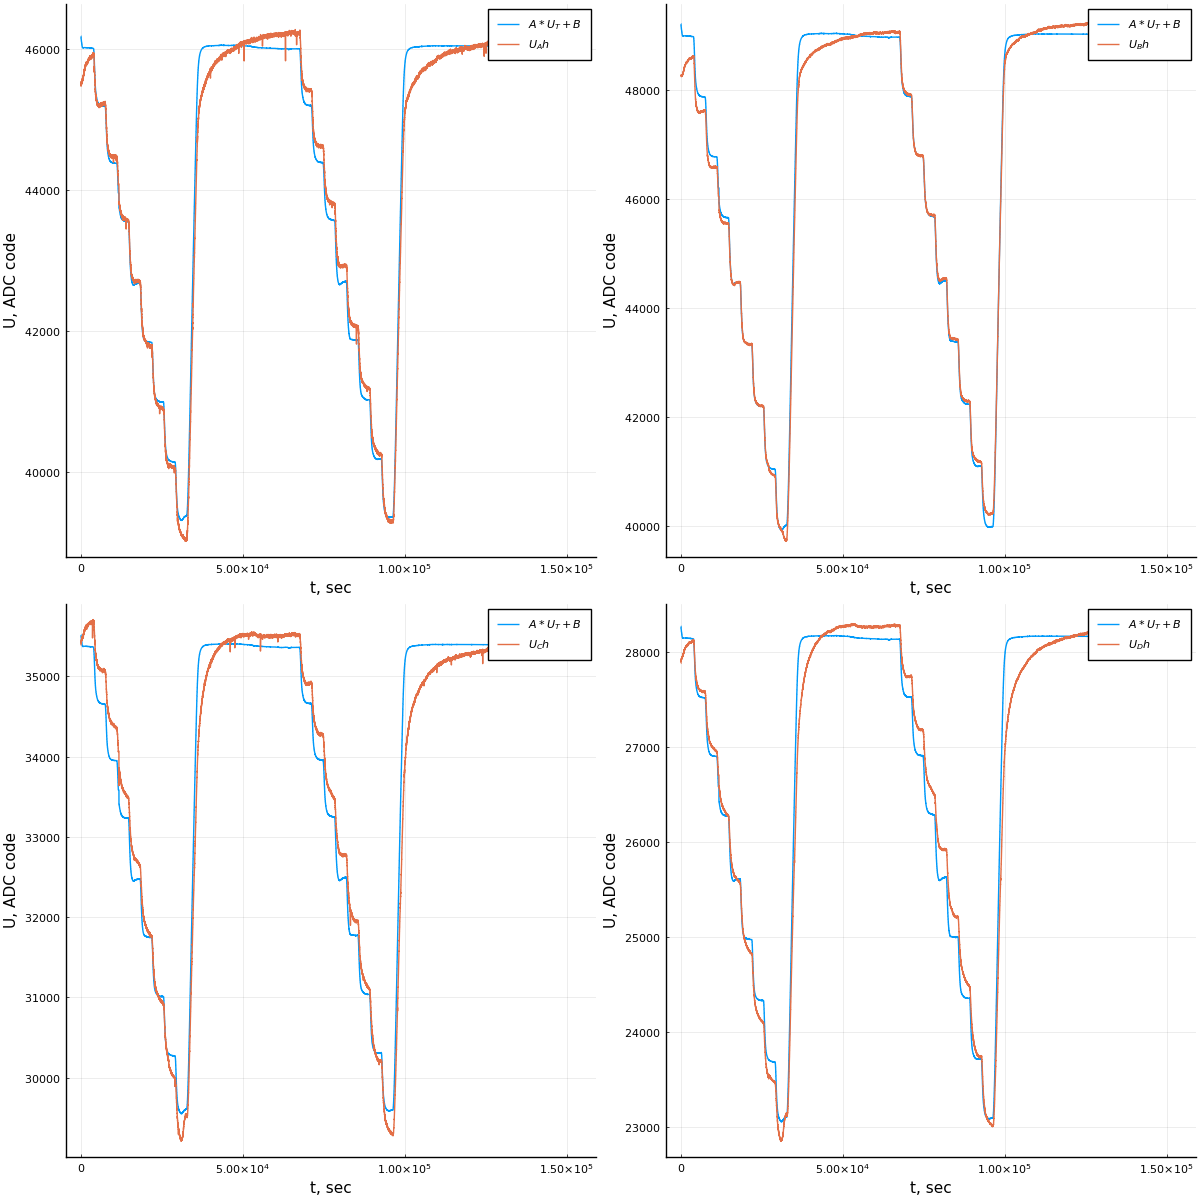

In [63]:
plt1 = plot(time1, (x*A)[:,1],xlabel = "t, sec",ylabel = "U, ADC code", label="\$ A*U_T+B \$")
plot!(time1, U[:,1],ylabel = "U, ADC code", label="\$ U_Ah \$")

plt2 = plot(time1, (x*A)[:,2],xlabel = "t, sec",ylabel = "U, ADC code", label="\$ A*U_T+B \$")
plot!(time1, U[:,2],ylabel = "U, ADC code", label="\$ U_Bh \$")

plt3 = plot(time1, (x*A)[:,3],xlabel = "t, sec",ylabel = "U, ADC code", label="\$ A*U_T+B \$")
plot!(time1, U[:,3],ylabel = "U, ADC code", label="\$ U_Ch \$")

plt4 = plot(time1, (x*A)[:,4],xlabel = "t, sec",ylabel = "U, ADC code", label="\$ A*U_T+B \$")
plot!(time1, U[:,4],ylabel = "U, ADC code", label="\$ U_Dh \$")
plot(plt1,plt2, plt3, plt4, layout = (2,2),size=(1200,1200))

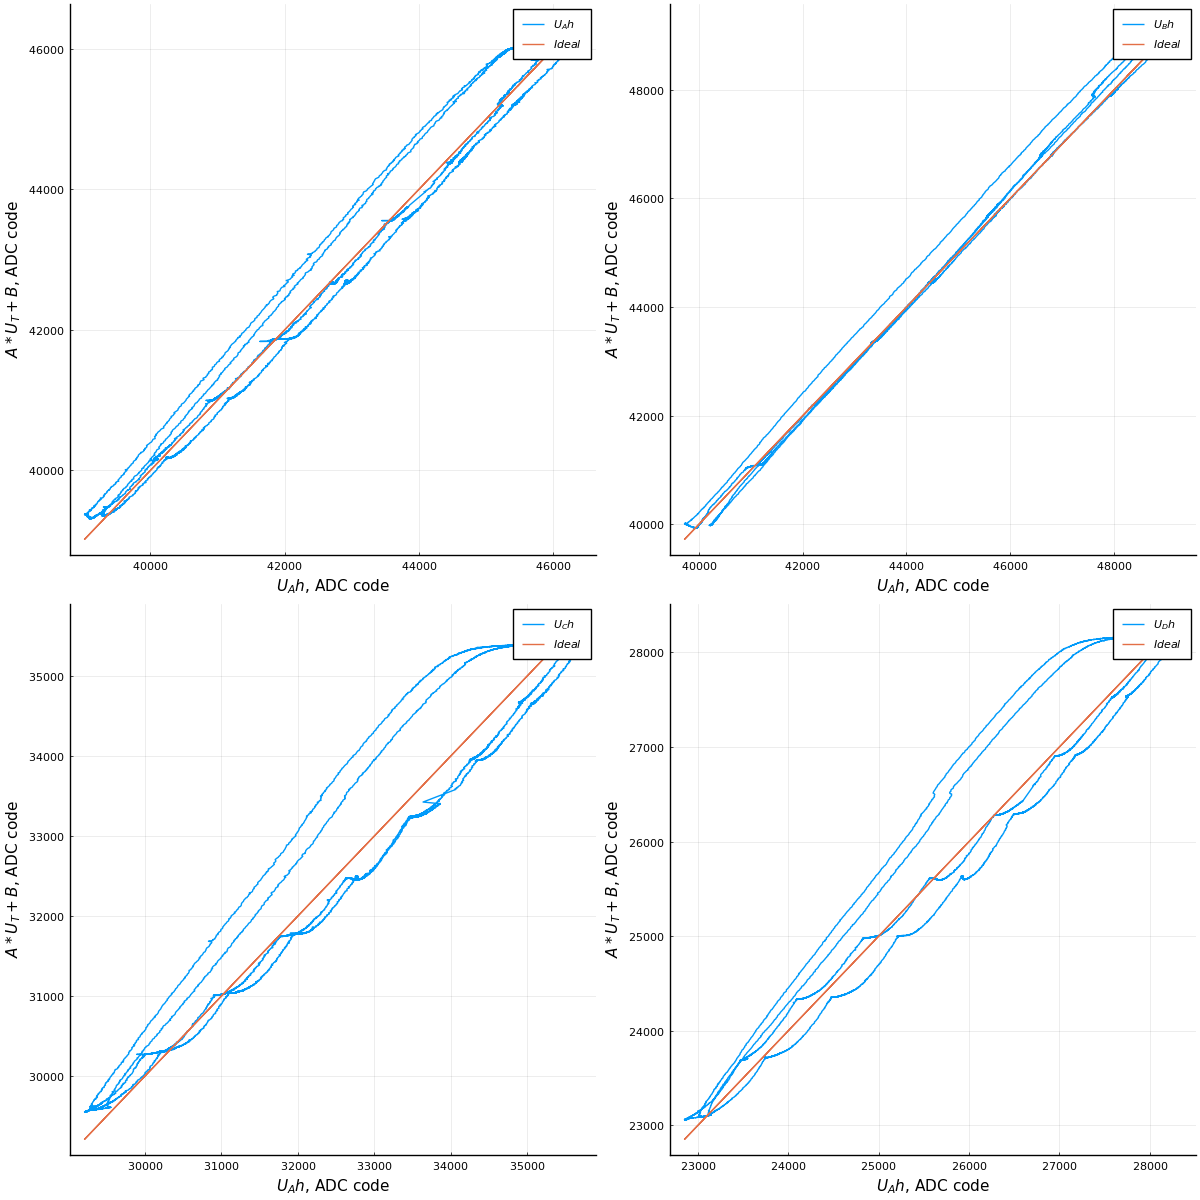

In [64]:
plt1 = plot(U[:,1], (x*A)[:,1],xlabel = "\$ U_Ah \$, ADC code",ylabel = "\$ A*U_T+B \$, ADC code", label= "\$ U_Ah \$")
plot!(U[:,1],U[:,1],xlabel = "\$ U_Ah \$, ADC code",ylabel = "\$ A*U_T+B \$, ADC code", label= "\$ Ideal \$")
plt2 = plot(U[:,2], (x*A)[:,2],xlabel = "\$ U_Bh \$, ADC code",ylabel = "\$ A*U_T+B \$, ADC code", label= "\$ U_Bh \$")
plot!(U[:,2],U[:,2],xlabel = "\$ U_Ah \$, ADC code",ylabel = "\$ A*U_T+B \$, ADC code", label= "\$ Ideal \$")
plt3 = plot(U[:,3], (x*A)[:,3],xlabel = "\$ U_Ch \$, ADC code",ylabel = "\$ A*U_T+B \$, ADC code", label= "\$ U_Ch \$")
plot!(U[:,3],U[:,3],xlabel = "\$ U_Ah \$, ADC code",ylabel = "\$ A*U_T+B \$, ADC code", label= "\$ Ideal \$")
plt4 = plot(U[:,4], (x*A)[:,4],xlabel = "\$ U_Dh \$, ADC code",ylabel = "\$ A*U_T+B \$, ADC code", label= "\$ U_Dh \$")
plot!(U[:,4],U[:,4],xlabel = "\$ U_Ah \$, ADC code",ylabel = "\$ A*U_T+B \$, ADC code", label= "\$ Ideal \$")
plot(plt1,plt2, plt3, plt4, layout = (2,2),size=(1200,1200))

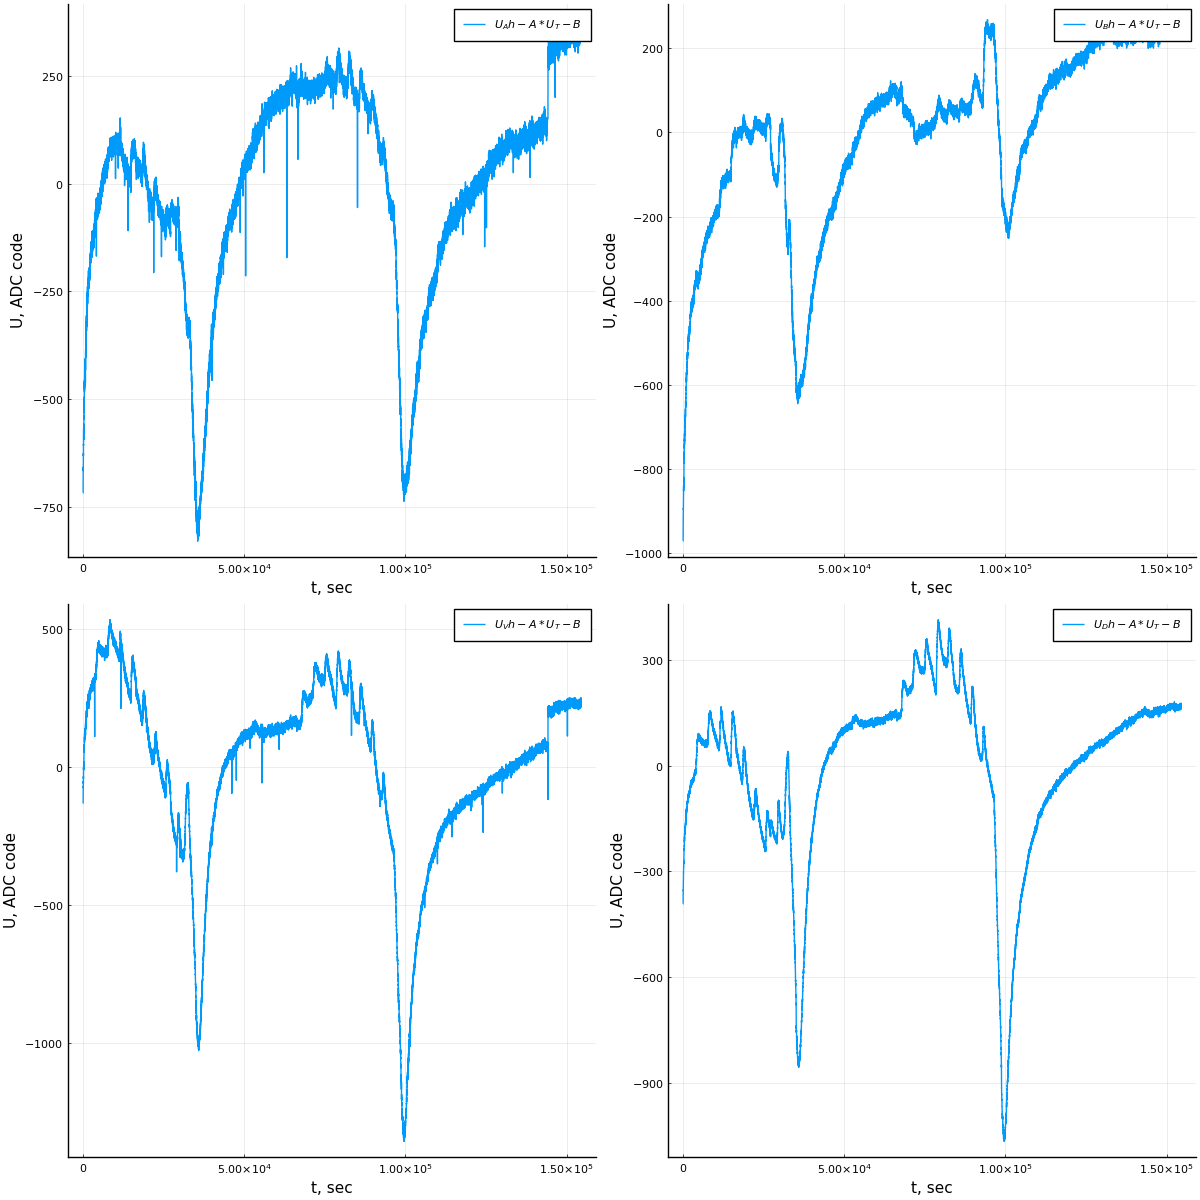

In [65]:

plt1 = plot(time1, U[:,1] - (x*A)[:,1] ,xlabel = "t, sec",ylabel = "U, ADC code", label="\$U_Ah - A*U_T-B \$")
plt2 = plot(time1, U[:,2] - (x*A)[:,2] ,xlabel = "t, sec",ylabel = "U, ADC code", label="\$U_Bh - A*U_T-B \$")
plt3 = plot(time1, U[:,3] - (x*A)[:,3] ,xlabel = "t, sec",ylabel = "U, ADC code", label="\$U_Vh - A*U_T-B \$")
plt4 = plot(time1, U[:,4] - (x*A)[:,4] ,xlabel = "t, sec",ylabel = "U, ADC code", label="\$U_Dh - A*U_T-B \$")

plot(plt1,plt2, plt3, plt4, layout = (2,2),size=(1200,1200))

## Cubic fitting

In [66]:
x = [ones(size(tempSens)) tempSens tempSens.^2 ]
A = x \ U

3×4 Array{Float64,2}:
 6840.95       16601.5         -14775.1         -3845.69
    1.18542        0.518822         1.87735         1.01771
   -6.0842e-6      5.92827e-6      -1.63352e-5     -6.14412e-6

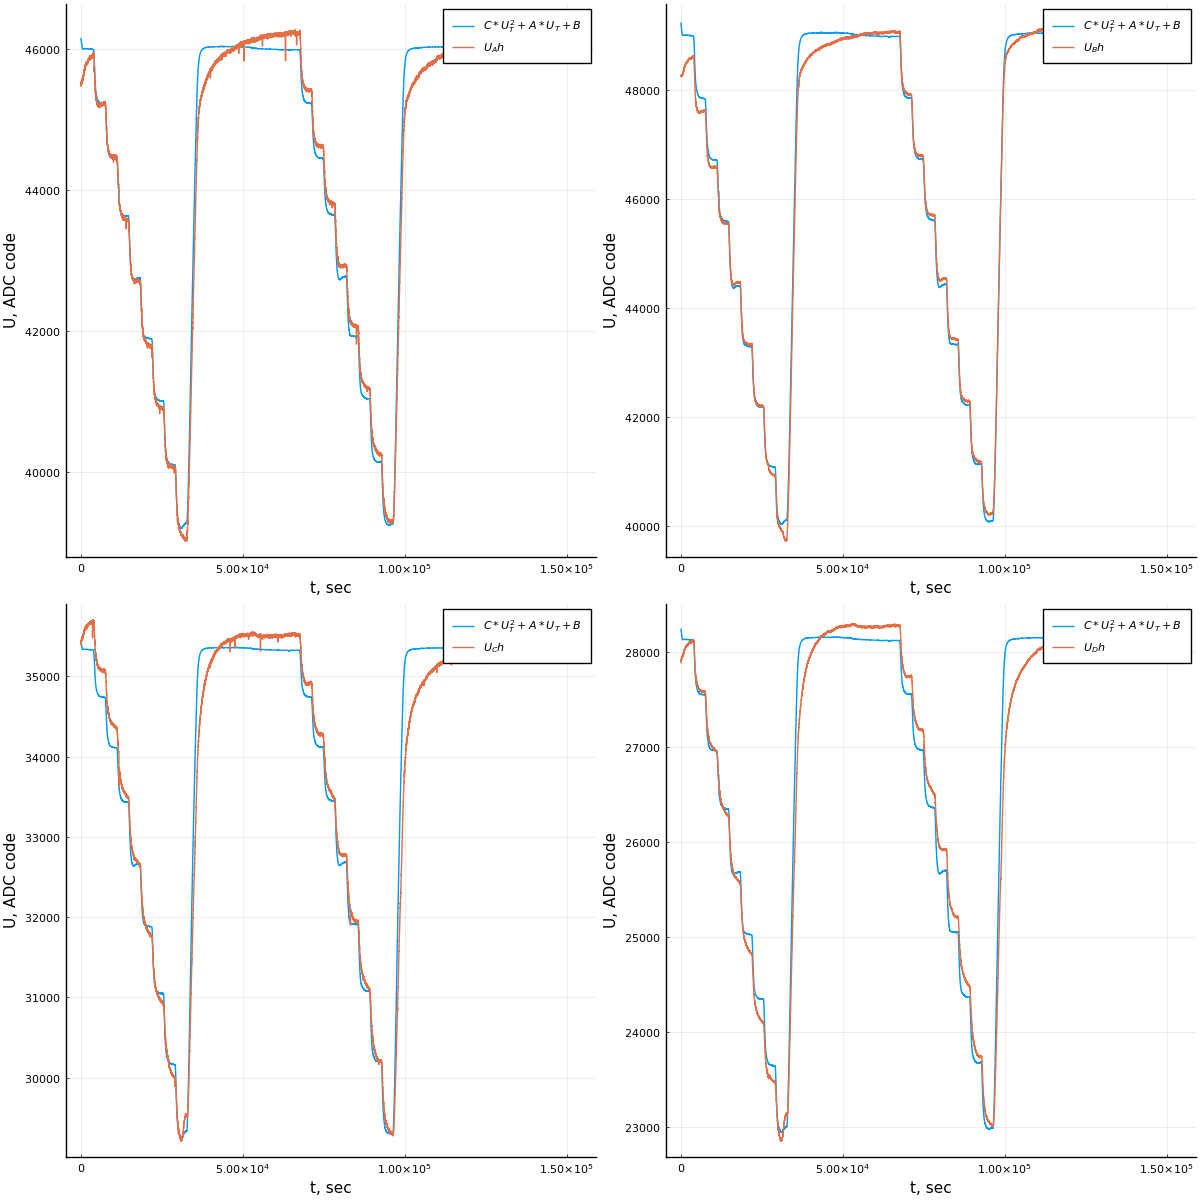

In [71]:
plt1 = plot(time1, (x*A)[:,1],xlabel = "t, sec",ylabel = "U, ADC code", label="\$C*U_T^2+ A*U_T+B \$")
plot!(time1, U[:,1],ylabel = "U, ADC code", label="\$ U_Ah \$")

plt2 = plot(time1, (x*A)[:,2],xlabel = "t, sec",ylabel = "U, ADC code", label="\$ C*U_T^2+A*U_T+B \$")
plot!(time1, U[:,2],ylabel = "U, ADC code", label="\$ U_Bh \$")

plt3 = plot(time1, (x*A)[:,3],xlabel = "t, sec",ylabel = "U, ADC code", label="\$C*U_T^2+A*U_T+B \$")
plot!(time1, U[:,3],ylabel = "U, ADC code", label="\$ U_Ch \$")

plt4 = plot(time1, (x*A)[:,4],xlabel = "t, sec",ylabel = "U, ADC code", label="\$ C*U_T^2+A*U_T+B \$")
plot!(time1, U[:,4],ylabel = "U, ADC code", label="\$ U_Dh \$")
plot(plt1,plt2, plt3, plt4, layout = (2,2),size=(1200,1200))

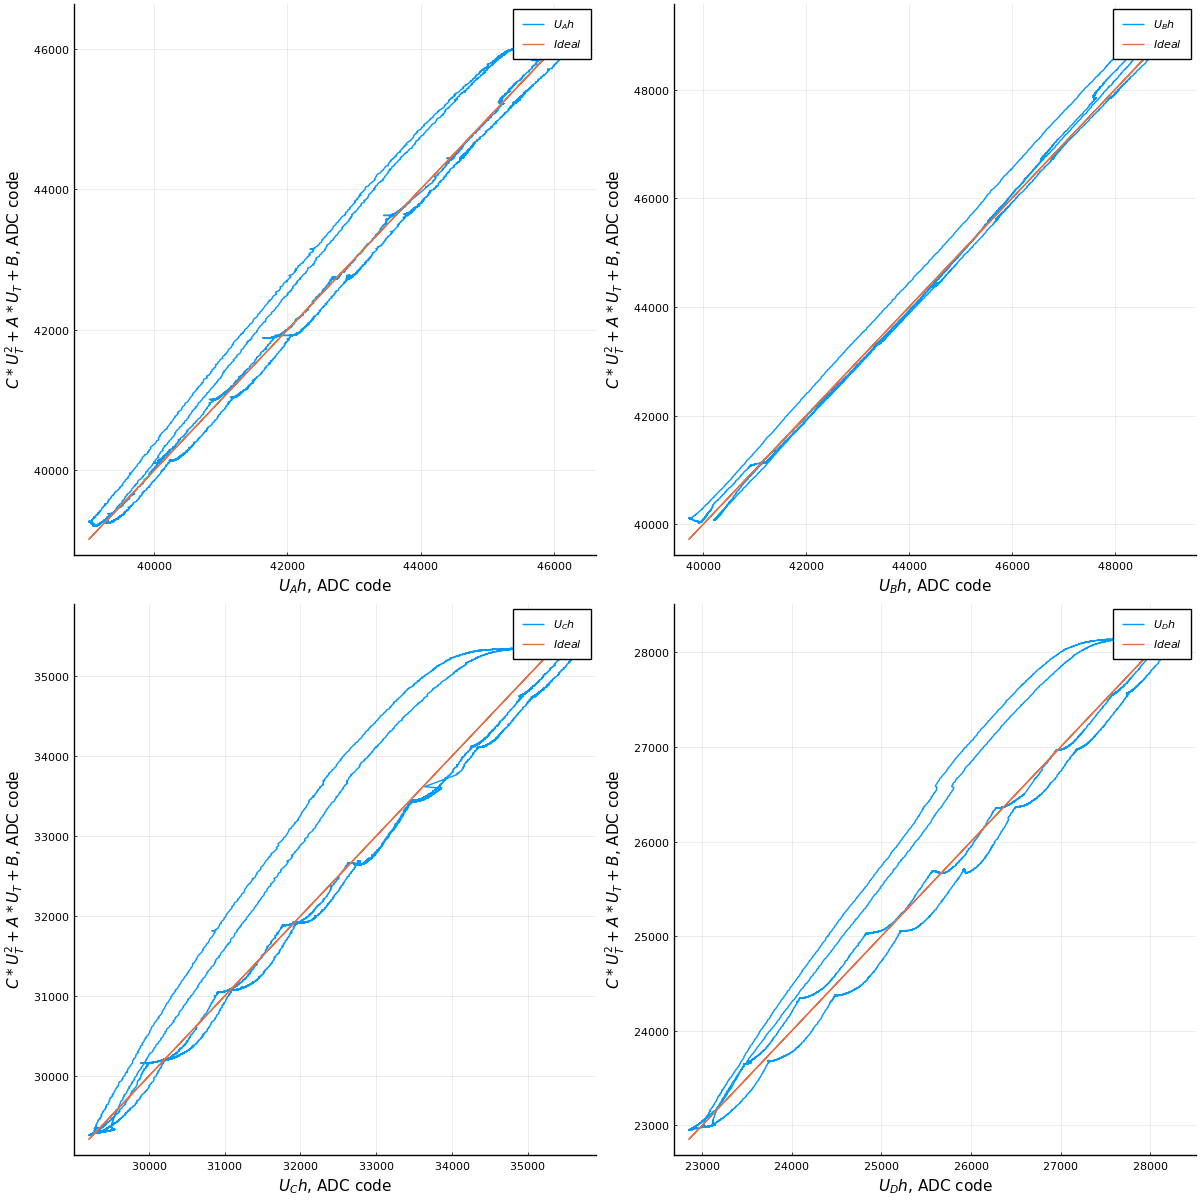

In [76]:
plt1 = plot(U[:,1], (x*A)[:,1],xlabel = "\$ U_Ah \$, ADC code",ylabel = "\$ C*U_T^2 + A*U_T+B \$, ADC code", label= "\$ U_Ah \$")
plot!(U[:,1],U[:,1], label= "\$ Ideal \$")
plt2 = plot(U[:,2], (x*A)[:,2],xlabel = "\$ U_Bh \$, ADC code",ylabel = "\$ C*U_T^2 + A*U_T+B \$, ADC code", label= "\$ U_Bh \$")
plot!(U[:,2],U[:,2], label= "\$ Ideal \$")
plt3 = plot(U[:,3], (x*A)[:,3],xlabel = "\$ U_Ch \$, ADC code",ylabel = "\$ C*U_T^2 + A*U_T+B \$, ADC code", label= "\$ U_Ch \$")
plot!(U[:,3],U[:,3], label= "\$ Ideal \$")
plt4 = plot(U[:,4], (x*A)[:,4],xlabel = "\$ U_Dh \$, ADC code",ylabel = "\$C*U_T^2 +  A*U_T+B \$, ADC code", label= "\$ U_Dh \$")
plot!(U[:,4],U[:,4], label= "\$ Ideal \$")
plot(plt1,plt2, plt3, plt4, layout = (2,2),size=(1200,1200))

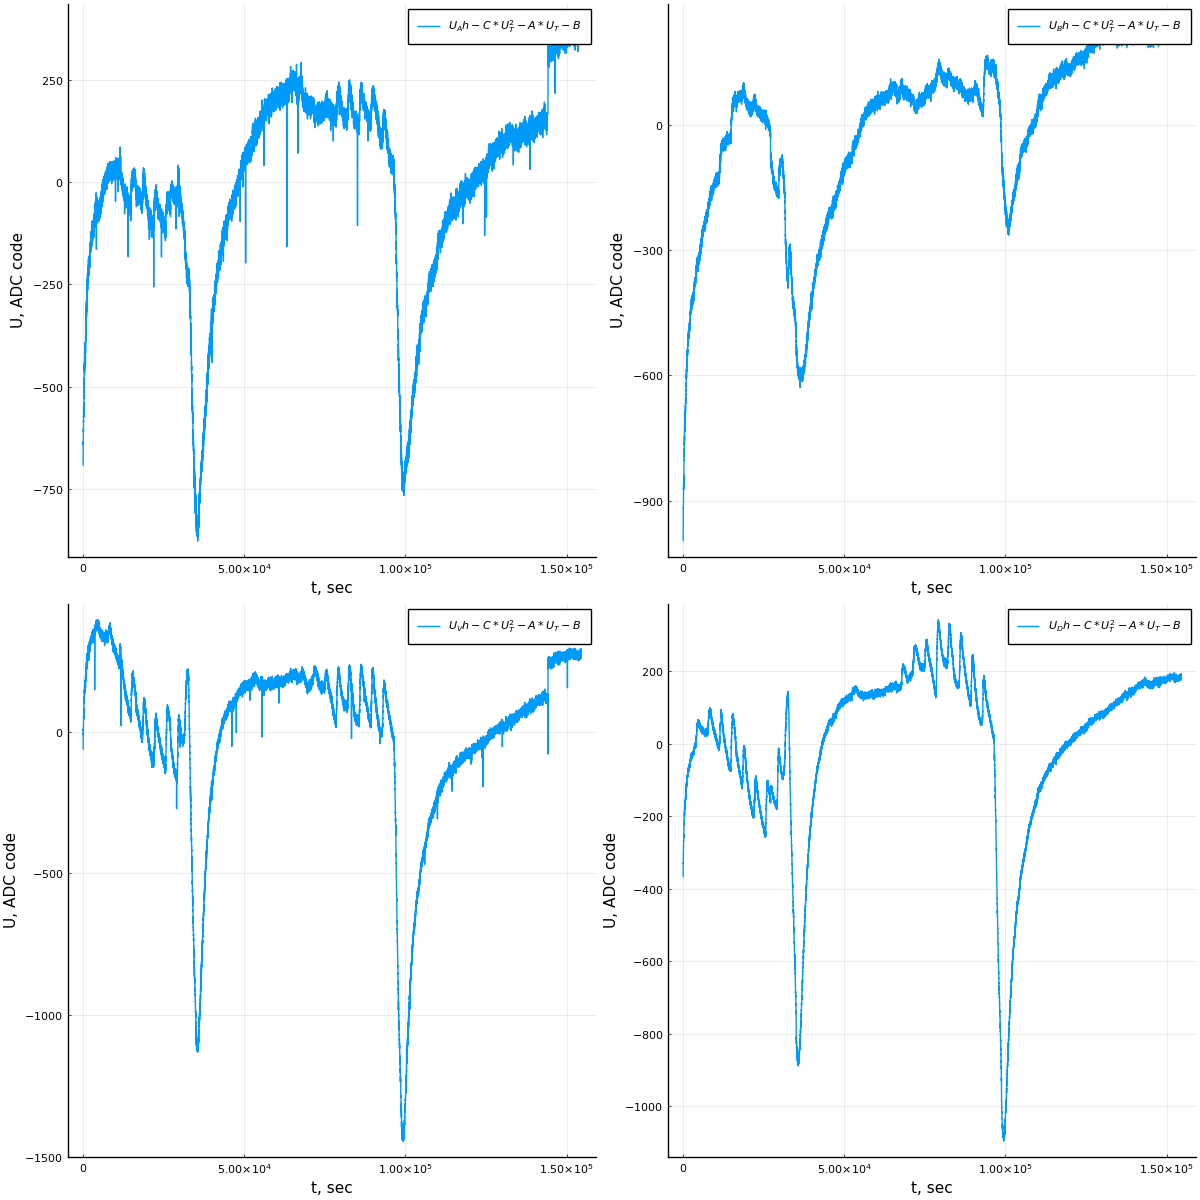

In [74]:


plt1 = plot(time1, U[:,1] - (x*A)[:,1] ,xlabel = "t, sec",ylabel = "U, ADC code", label="\$U_Ah - C*U_T^2 - A*U_T-B \$")
plt2 = plot(time1, U[:,2] - (x*A)[:,2] ,xlabel = "t, sec",ylabel = "U, ADC code", label="\$U_Bh - C*U_T^2 - A*U_T-B \$")
plt3 = plot(time1, U[:,3] - (x*A)[:,3] ,xlabel = "t, sec",ylabel = "U, ADC code", label="\$U_Vh - C*U_T^2 - A*U_T-B \$")
plt4 = plot(time1, U[:,4] - (x*A)[:,4] ,xlabel = "t, sec",ylabel = "U, ADC code", label="\$U_Dh - C*U_T^2 - A*U_T-B \$")

plot(plt1,plt2, plt3, plt4, layout = (2,2),size=(1200,1200))